# Exercise: Linear Models

In this exercise, we'll be exploring two types of linear models, one regression, one classification. While regression is what you typically think of for a linear model, they can also be used effectively in classification problems.

You're tasked with compeleting the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a LogisticRegression model with these hyper parameters: random_state=0, max_iter=10000
4. Evaluate the model with the test dataset
5. Load the diabetes dataset from scikit learn
6. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
7. Create a SGDRegressor model model with these hyper parameters: random_state=0, max_iter=10000
8. Evaluate the model with the test dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDRegressor

## Linear Classifier

In [3]:
# Load in the wine dataset
wine = datasets.load_wine()

In [4]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [5]:
# Check your dataframe by `.head()`
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2)

In [7]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
clf = LogisticRegression().fit(df_train[wine.feature_names], df_train['target'])
clf.score(df_test[wine.feature_names], df_test['target'])

/Users/sergiolobo/Documents/Udacity/ML nanodegree/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9166666666666666

In [8]:
# predict the target for the test dataset and add it to the dataframe
df_test['predicted'] = clf.predict(df_test[wine.feature_names])

In [9]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,predicted
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1,1
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2,2
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0,0
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0,0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1,1


In [10]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot:xlabel='flavanoids', ylabel='malic_acid'>

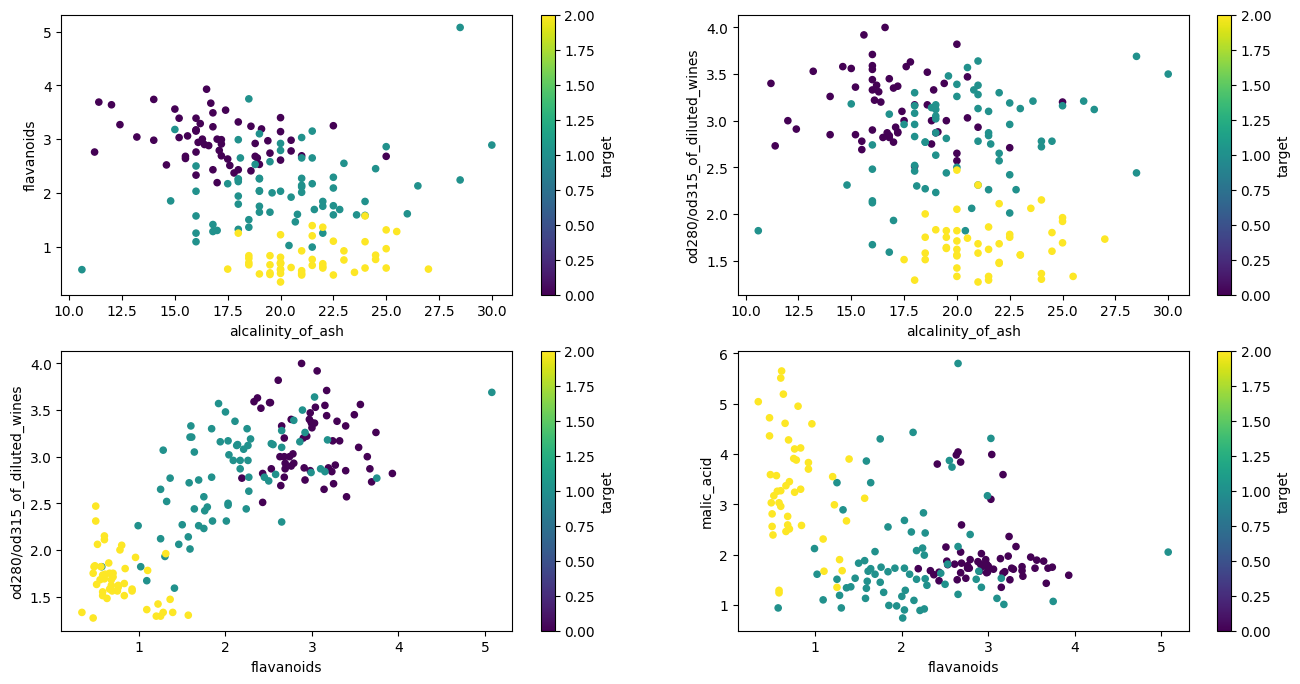

In [11]:
from matplotlib import pyplot as plt 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
df.plot(ax=axes[0,0], x='alcalinity_of_ash', y='flavanoids', kind='scatter', c='target', colormap='viridis')
df.plot(ax=axes[0,1], x='alcalinity_of_ash', y='od280/od315_of_diluted_wines', kind='scatter', c='target', colormap='viridis')
df.plot(ax=axes[1,0], x='flavanoids', y='od280/od315_of_diluted_wines', kind='scatter', c='target', colormap='viridis')
df.plot(ax=axes[1,1], x='flavanoids', y='malic_acid', kind='scatter', c='target', colormap='viridis')


In [15]:
clf = LogisticRegression().fit(df_train[['flavanoids', 'od280/od315_of_diluted_wines']], df_train['target'])
clf.score(df_test[['flavanoids', 'od280/od315_of_diluted_wines']], df_test['target'])

0.7777777777777778

/Users/sergiolobo/Documents/Udacity/ML nanodegree/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


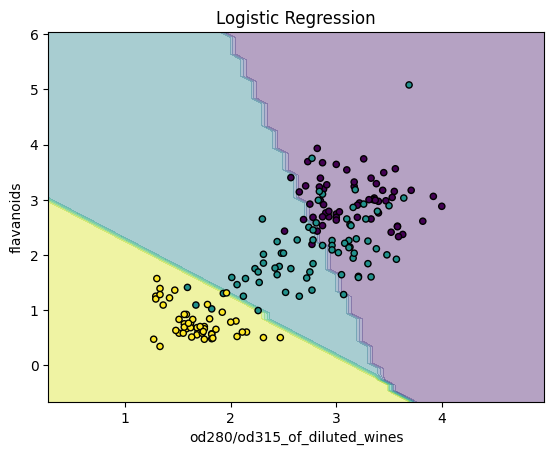

In [16]:
#plot the decision boundary, usin plt , pd and np (the clasifier has 13 features, only plot 2)

# Create a meshgrid as our test data
x_min, x_max = df['od280/od315_of_diluted_wines'].min() - 1, df['od280/od315_of_diluted_wines'].max() + 1
y_min, y_max = df['flavanoids'].min() - 1, df['flavanoids'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the target for the test data (including the other features)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(df['od280/od315_of_diluted_wines'], df['flavanoids'], c=df['target'], s=20, edgecolor='k')
plt.title('Logistic Regression')
plt.xlabel('od280/od315_of_diluted_wines')
plt.ylabel('flavanoids')
plt.show()

## Linear Regression

In [17]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [18]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [23]:
# Check your dataframe by `.head()`
dfd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [20]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2)

In [24]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
reg = SGDRegressor(random_state=0, max_iter=10000).fit(dfd_train[diabetes.feature_names], dfd_train['target'])
reg.score(dfd_test[diabetes.feature_names], dfd_test['target'])

0.4847233568056002